# Importing All Libraries

In [240]:
#importing all the required libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import gdown

# Load DataSet

In [241]:
df = pd.read_csv('/content/CBC data_for_meandeley_csv(1).csv')

# Renaming Colunms

In [242]:
# Rename specific columns
df = df.rename(columns={
    'S. No.': 'Serial_Number',
    'Age      ': 'Age',
    'Sex  ': 'Sex',
    '  RBC    ': 'RBC',
    'PCV': 'PCV',
    'MCV  ': 'MCV',
    'MCH': 'MCH',
    ' MCHC  ': 'MCHC',
    ' RDW    ': 'RDW',
    'TLC': 'TLC',
    ' PLT /mm3': 'PLT',
    ' HGB ': 'HGB'
})

print("Updated Column Names:")
print(df.columns)

Updated Column Names:
Index(['Serial_Number', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC',
       'RDW', 'TLC', 'PLT', 'HGB'],
      dtype='object')


# Observing DataSet


In [243]:
df.shape

(364, 12)

In [244]:
df.head()

,Serial_Number,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT,HGB
0,1,28,0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6
1,2,41,0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8
2,3,40,1,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4
3,4,76,0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3
4,5,20,1,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5


In [245]:
df.describe()

,Serial_Number,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT,HGB
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,182.500000,44.917582,0.442308,4.278736,36.762912,87.509121,28.227143,32.053407,15.116511,8.863571,223.750824,11.907692
std,105.221988,18.780854,0.497344,0.820166,6.830835,9.332164,3.865998,2.801790,2.176557,4.868502,99.407153,2.186686
min,1.000000,11.000000,0.000000,1.360000,13.100000,55.700000,14.700000,23.600000,10.600000,2.000000,10.000000,4.200000
25%,91.750000,28.000000,0.000000,3.780000,32.900000,83.175000,26.300000,30.300000,13.600000,5.900000,153.000000,10.600000
50%,182.500000,44.500000,0.000000,4.335000,36.800000,87.950000,28.200000,31.700000,14.800000,7.935000,210.000000,12.100000
75%,273.250000,60.000000,1.000000,4.800000,41.850000,91.875000,30.400000,33.300000,16.100000,10.205000,268.250000,13.400000
max,364.000000,89.000000,1.000000,6.900000,56.900000,124.100000,41.400000,50.200000,29.200000,42.420000,660.000000,19.600000


In [246]:
df.isnull().sum()

Serial_Number    0
Age              0
Sex              0
RBC              0
PCV              0
MCV              0
MCH              0
MCHC             0
RDW              0
TLC              0
PLT              0
HGB              0
dtype: int64

# Removing outlier

In [247]:
outlier_data = df

z_scores = zscore(outlier_data)

threshold = 3

non_outliered_data = outlier_data[(z_scores < threshold).all(axis=1)]
non_outliered_data.shape

(339, 12)

# Removing Serial No

In [248]:
data = non_outliered_data.drop('Serial_Number', axis = 1)

# Making age Group

In [249]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

data = data.drop('Age', axis = 1)

# Making New Status column (derived dependent variable)

In [250]:
def categorize_rbc_hgb(row):
  if row['Sex'] == 0:
    if row['HGB'] < 8.0:
      return 0 #severe
    if row['HGB'] <= 10.9:
      return 1 #moderate
    else:
      return 2 #mild
  else:
    if row['HGB'] < 8.0:
      return 0 #severe
    if row['HGB'] <= 10.9:
      return 1 #moderate
    else:
      return 2 #mild


data['status'] = data.apply(categorize_rbc_hgb, axis=1)
data['status']

0      1
1      2
2      2
3      2
4      2
      ..
359    2
360    2
361    2
362    2
363    2
Name: status, Length: 339, dtype: int64

In [251]:
data.head()

,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT,HGB,AgeGroup,status
0,0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6,21-40,1
1,0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8,41-60,2
2,1,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4,21-40,2
3,0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3,61-80,2
4,1,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5,0-20,2


# Plots

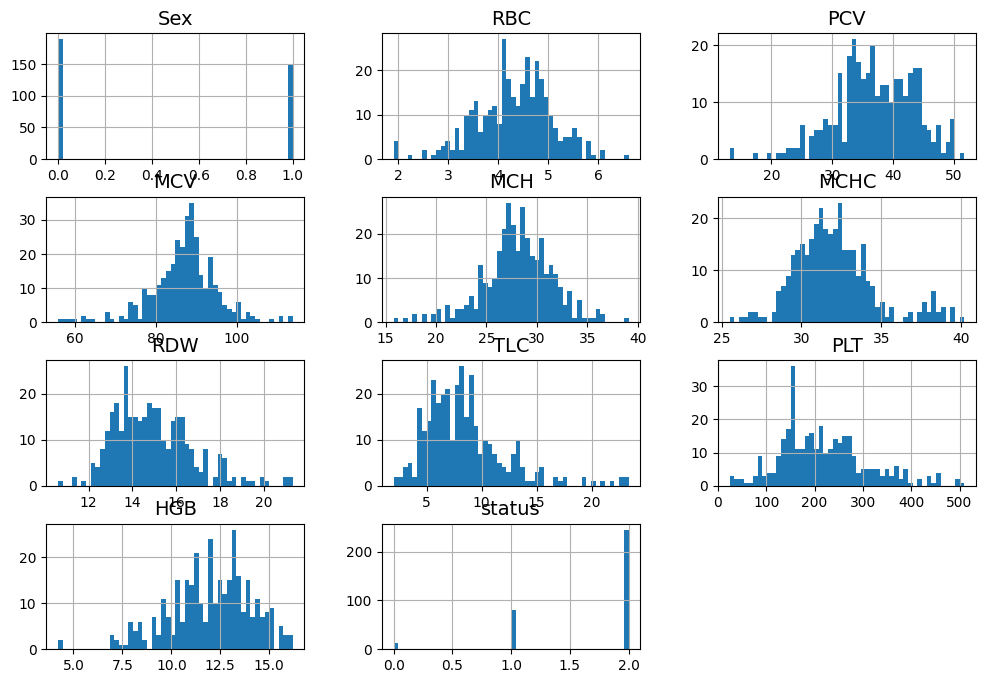

In [252]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 8))

plt.show()

# Lebel Encoding

In [253]:
label_encoder = LabelEncoder()

data['AgeGroup'] = label_encoder.fit_transform(data['AgeGroup'])

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339 entries, 0 to 363
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       339 non-null    int64  
 1   RBC       339 non-null    float64
 2   PCV       339 non-null    float64
 3   MCV       339 non-null    float64
 4   MCH       339 non-null    float64
 5   MCHC      339 non-null    float64
 6   RDW       339 non-null    float64
 7   TLC       339 non-null    float64
 8   PLT       339 non-null    float64
 9   HGB       339 non-null    float64
 10  AgeGroup  339 non-null    int64  
 11  status    339 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 34.4 KB


# MinMax Scaling

In [255]:
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
data_minmax_scaled = minmax_scaler.fit_transform(data)


min_max_scaled_data = pd.DataFrame(
    data_minmax_scaled,
    columns=data.columns,
    index=data.index
)

processed_data = min_max_scaled_data.drop('status', axis = 1)
processed_data['Status'] = data['status']
processed_data

,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT,HGB,AgeGroup,Status
0,0.0,0.799574,0.541451,0.075731,0.051502,0.183673,0.878505,0.426030,0.214609,0.450000,0.25,1
1,0.0,0.611940,0.813472,0.643718,0.562232,0.374150,0.224299,0.235019,0.812757,0.800000,0.50,2
2,1.0,0.584222,0.738342,0.581756,0.557940,0.455782,0.224299,0.285112,0.619342,0.766667,0.25,2
3,0.0,0.496802,0.611399,0.531842,0.467811,0.360544,0.401869,0.534176,0.493827,0.591667,0.75,2
4,1.0,0.475480,0.616580,0.574871,0.515021,0.387755,0.242991,0.128745,0.353909,0.608333,0.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...
359,0.0,0.628998,0.676166,0.430293,0.510730,0.605442,0.261682,0.112360,0.320988,0.775000,0.00,2
360,0.0,0.626866,0.572539,0.619621,0.652361,0.564626,0.252336,0.168539,0.393004,0.900000,0.50,2
361,1.0,0.545842,0.689119,0.567986,0.579399,0.510204,0.271028,0.337079,0.627572,0.741667,0.25,2
362,1.0,0.605544,0.598446,0.533563,0.519313,0.448980,0.271028,0.209738,0.308642,0.750000,0.25,2


# Corr Matrix


<Axes: >

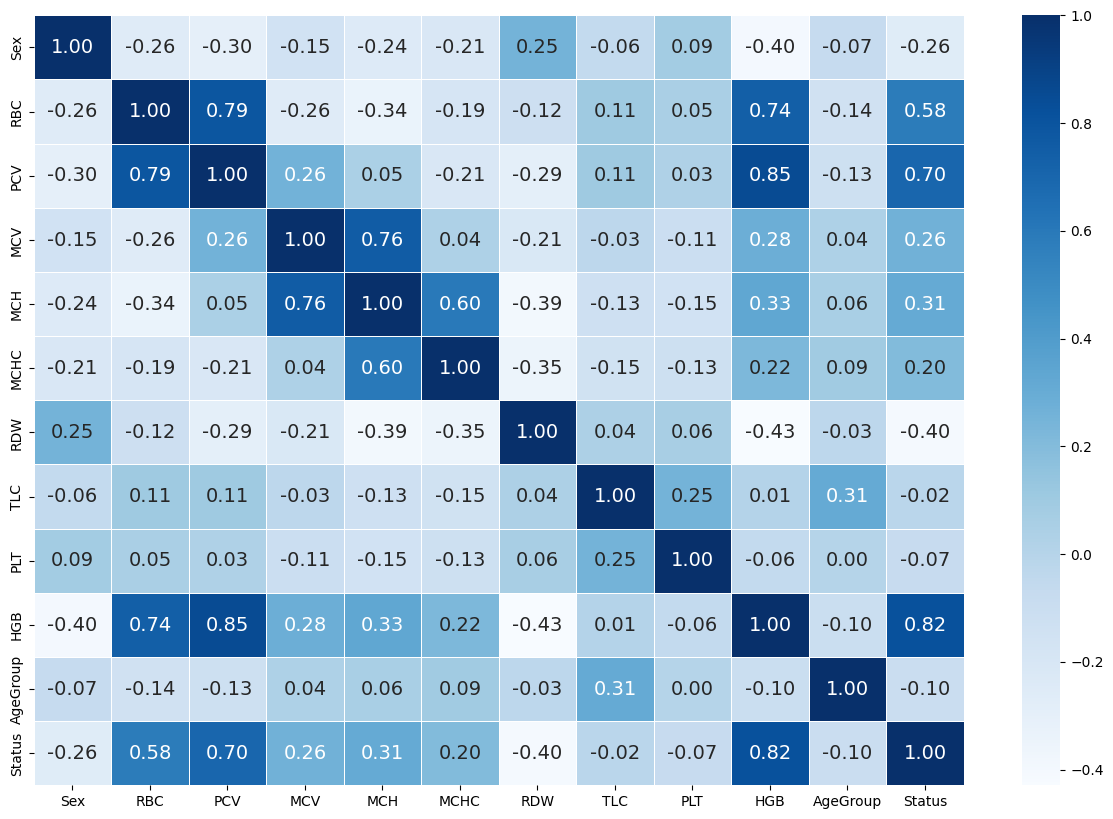

In [256]:
plt.figure(figsize=(15, 10))
sns.heatmap(processed_data.corr(),
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="Blues")

# T test Sex and HGB

In [257]:
sample1 = processed_data[processed_data['Sex'] == 1.0]['HGB']


sample2 = processed_data[processed_data['Sex'] == 0.0]['HGB']

print(sample1)

t_stat, p_value = ttest_ind(sample1, sample2)
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

2      0.766667
4      0.608333
6      0.683333
20     0.708333
21     0.425000
         ...   
350    0.875000
352    0.691667
355    0.725000
361    0.741667
362    0.750000
Name: HGB, Length: 150, dtype: float64
T-statistic value:  -8.042890976546348
P-Value:  1.5074639396172198e-14


In [258]:
sample1 = processed_data[processed_data['Sex'] == 1.0]['Status']


sample2 = processed_data[processed_data['Sex'] == 0.0]['Status']

print(sample1)

t_stat, p_value = ttest_ind(sample1, sample2)
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

2      2
4      2
6      2
20     2
21     1
      ..
350    2
352    2
355    2
361    2
362    2
Name: Status, Length: 150, dtype: int64
T-statistic value:  -4.936316244427581
P-Value:  1.2544221121289546e-06


There is a significant difference

In [259]:
sample1 = processed_data[processed_data['Sex'] == 1.0]['Status']


sample2 = processed_data[processed_data['Sex'] == 0.0]['Status']

print(sample1)

t_stat, p_value = ttest_ind(sample1, sample2)
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

2      2
4      2
6      2
20     2
21     1
      ..
350    2
352    2
355    2
361    2
362    2
Name: Status, Length: 150, dtype: int64
T-statistic value:  -4.936316244427581
P-Value:  1.2544221121289546e-06


There is a significant difference

# Anova 2 rbc pcv hgb

In [260]:
temp = pd.DataFrame()

temp['A'] = processed_data['RBC']
temp['B'] = processed_data['PCV']
temp['C'] = processed_data['HGB']

# Perform two-way ANOVA
model = ols('C ~ A + B + A:B', data=temp).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


            sum_sq     df           F        PR(>F)
A         0.112855    1.0   14.257302  1.885881e-04
B         1.940667    1.0  245.169255  7.481446e-42
A:B       0.020817    1.0    2.629825  1.058140e-01
Residual  2.651732  335.0         NaN           NaN


In [261]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

temp = pd.DataFrame()

temp['A'] = processed_data['RBC']
temp['B'] = processed_data['PCV']
temp['C'] = processed_data['Status']

# Perform two-way ANOVA
model = ols('C ~ A + B + A:B', data=temp).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

             sum_sq     df           F        PR(>F)
A          0.205152    1.0    1.537267  2.158928e-01
B         15.267039    1.0  114.400631  3.642207e-23
A:B        5.677961    1.0   42.546715  2.546497e-10
Residual  44.706556  335.0         NaN           NaN


# Anova 2 mcv mch hgb

In [262]:
temp = pd.DataFrame()

temp['A'] = processed_data['MCV']
temp['B'] = processed_data['MCH']
temp['C'] = processed_data['HGB']

# Perform two-way ANOVA
model = ols('C ~ A + B + A:B', data=temp).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


            sum_sq     df          F    PR(>F)
A         0.017652    1.0   0.692280  0.405983
B         0.357277    1.0  14.011809  0.000214
A:B       0.443904    1.0  17.409185  0.000038
Residual  8.541920  335.0        NaN       NaN


In [263]:
temp = pd.DataFrame()

temp['A'] = processed_data['MCV']
temp['B'] = processed_data['MCH']
temp['C'] = processed_data['Status']

# Perform two-way ANOVA
model = ols('C ~ A + B + A:B', data=temp).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


             sum_sq     df          F        PR(>F)
A          0.189992    1.0   0.766283  3.819966e-01
B          2.919485    1.0  11.774960  6.754787e-04
A:B        6.282842    1.0  25.340159  7.862296e-07
Residual  83.059939  335.0        NaN           NaN


# Anova 1 agegroup

In [264]:
# Perform one-way ANOVA for HGB
model_hgb = ols('HGB ~ C(AgeGroup)', data=processed_data).fit()
anova_table_hgb = sm.stats.anova_lm(model_hgb, typ=2)

# Perform one-way ANOVA for Status
model_status = ols('Status ~ C(AgeGroup)', data=processed_data).fit()
anova_table_status = sm.stats.anova_lm(model_status, typ=2)



# Display results
anova_table_hgb, anova_table_status


(               sum_sq     df         F   PR(>F)
 C(AgeGroup)  0.242567    4.0  2.046215  0.08762
 Residual     9.898426  334.0       NaN      NaN,
                 sum_sq     df         F    PR(>F)
 C(AgeGroup)   2.791699    4.0  2.417232  0.048528
 Residual     96.435440  334.0       NaN       NaN)

# Anova 2 rwd MCHC

In [265]:
temp = pd.DataFrame()

temp['A'] = processed_data['RDW']
temp['B'] = processed_data['MCHC']
temp['C'] = processed_data['HGB']

# Perform two-way ANOVA
model = ols('C ~ A + B + A:B', data=temp).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


            sum_sq     df          F        PR(>F)
A         1.437881    1.0  59.311341  1.532406e-13
B         0.056101    1.0   2.314103  1.291485e-01
A:B       0.095087    1.0   3.922257  4.846860e-02
Residual  8.121381  335.0        NaN           NaN


In [266]:
temp = pd.DataFrame()

temp['A'] = processed_data['RDW']
temp['B'] = processed_data['MCHC']
temp['C'] = processed_data['Status']

# Perform two-way ANOVA
model = ols('C ~ A + B + A:B', data=temp).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

             sum_sq     df          F        PR(>F)
A         12.481173    1.0  52.324538  3.223484e-12
B          0.451611    1.0   1.893280  1.697516e-01
A:B        2.725342    1.0  11.425388  8.100062e-04
Residual  79.908836  335.0        NaN           NaN


# Regression


In [267]:
from sklearn.model_selection import train_test_split
x = processed_data.iloc[:, 0:7]
y = processed_data.iloc[:, 9]
x = x.drop('MCV', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x

,Sex,RBC,PCV,MCH,MCHC,RDW
0,0.0,0.799574,0.541451,0.051502,0.183673,0.878505
1,0.0,0.611940,0.813472,0.562232,0.374150,0.224299
2,1.0,0.584222,0.738342,0.557940,0.455782,0.224299
3,0.0,0.496802,0.611399,0.467811,0.360544,0.401869
4,1.0,0.475480,0.616580,0.515021,0.387755,0.242991
...,...,...,...,...,...,...
359,0.0,0.628998,0.676166,0.510730,0.605442,0.261682
360,0.0,0.626866,0.572539,0.652361,0.564626,0.252336
361,1.0,0.545842,0.689119,0.579399,0.510204,0.271028
362,1.0,0.605544,0.598446,0.519313,0.448980,0.271028


# LinearRegression

In [268]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model1 = LinearRegression()

model1.fit(X_train, y_train)

predictions = model1.predict(X_test)

mse1 = mean_squared_error(y_test, predictions)
r2_Score1 = r2_score(y_test, predictions)
mse1, r2_Score1

(0.002074788681998784, 0.9244170890683823)

# PolynomialFeatures

In [269]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Creating polynomial features
degree = 2  # Degree of polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Creating and fitting the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predicting on the test set
y_pred = poly_reg.predict(X_test_poly)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)

r2_Score1 = r2_score(y_test, y_pred)
mse, r2_Score1


(0.0010759968332690346, 0.9608022862678582)

# XGB Regressor


In [270]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor


model = XGBRegressor()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2_Score1 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
r2_Score1

Root Mean Squared Error (RMSE): 0.047588345729096766


0.9175005677458983

# Shap for Polynomial Regression


In [271]:
!pip install shap

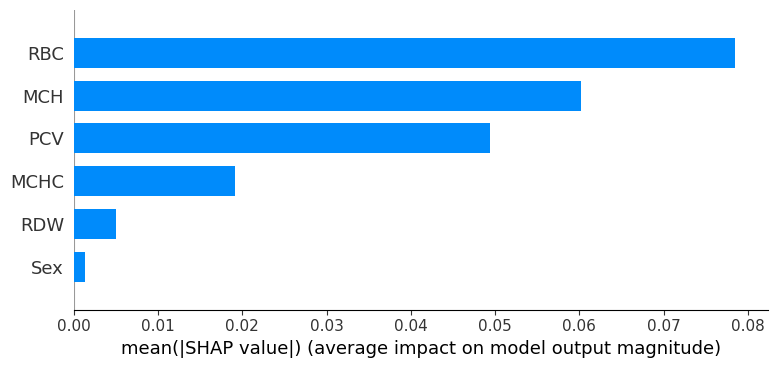

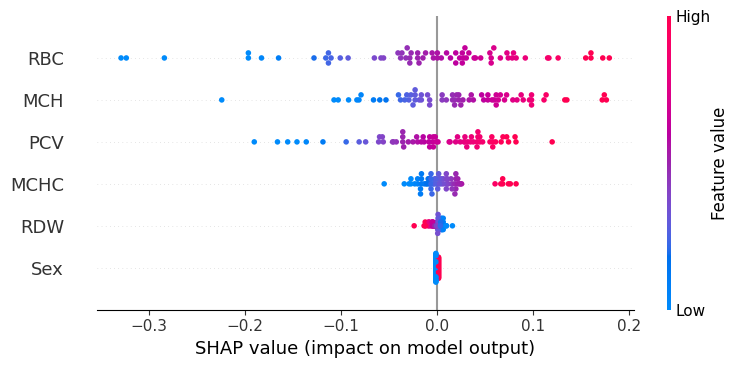

In [272]:
import shap
# Compute SHAP values
explainer = shap.Explainer(model1, X_train)
shap_values = explainer(X_test)

# Visualizations
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=x.columns)  # Summary bar plot
shap.summary_plot(shap_values, X_test, plot_type="dot", feature_names=x.columns)  # Summary bee-swarm plot

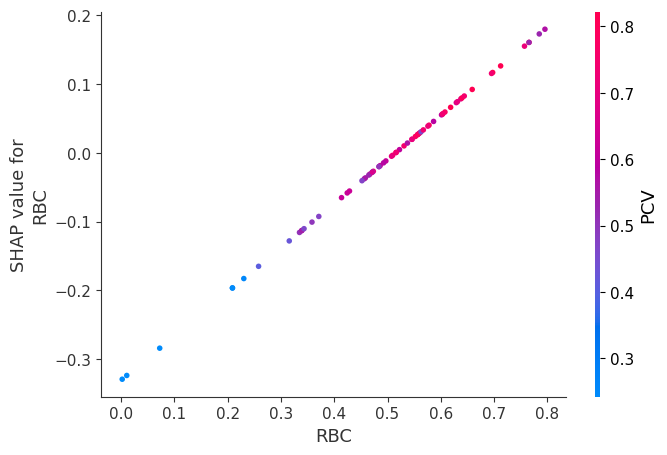

In [273]:
import numpy as np
# Calculate the mean of the absolute SHAP values for each feature
mean_shap_values = np.abs(shap_values.values).mean(axis=0)
top_feature_index = np.argmax(mean_shap_values)
top_feature = x.columns[top_feature_index]

# Dependence plot for the most important feature
shap.dependence_plot(top_feature_index, shap_values.values, X_test, feature_names=x.columns)

# Assuming X_test is still a DataFrame. If it's not, make sure to convert or keep it as a DataFrame after scaling.
shap.initjs()
# Force plot for a single prediction
shap.force_plot(explainer.expected_value, shap_values.values[0,:], X_test.iloc[0,:], feature_names=x.columns)

In [274]:
e3 = shap.Explainer(model1, X_train)
shap.initjs()
shap.force_plot(e3.expected_value, shap_values.values[0:500,:], X_test.iloc[0:500,:], feature_names=x.columns)

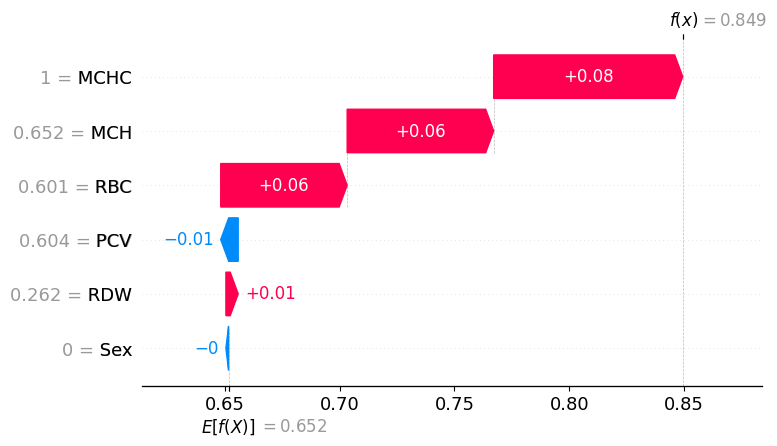

In [275]:
shap.waterfall_plot(shap_values[0])

# Regression Summery

| Model | MSE | R2 Score
|-----------------|----------------|--------------|
| LinearRegression   | 0.002074788681998784   | 0.9244170890683823 |
| PolynomialRegression   | 0.0010759968332690346   | 0.9608022862678582 |
| XGBRegression   | 0.047588345729096766  | 0.9175005677458983 |

# Classificassion


In [276]:
from sklearn.model_selection import train_test_split
x = processed_data.iloc[:, 0:7]
y = processed_data.iloc[:, 11]
x = x.drop('MCV', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x

,Sex,RBC,PCV,MCH,MCHC,RDW
0,0.0,0.799574,0.541451,0.051502,0.183673,0.878505
1,0.0,0.611940,0.813472,0.562232,0.374150,0.224299
2,1.0,0.584222,0.738342,0.557940,0.455782,0.224299
3,0.0,0.496802,0.611399,0.467811,0.360544,0.401869
4,1.0,0.475480,0.616580,0.515021,0.387755,0.242991
...,...,...,...,...,...,...
359,0.0,0.628998,0.676166,0.510730,0.605442,0.261682
360,0.0,0.626866,0.572539,0.652361,0.564626,0.252336
361,1.0,0.545842,0.689119,0.579399,0.510204,0.271028
362,1.0,0.605544,0.598446,0.519313,0.448980,0.271028


# XGBClassifier


Accuracy: 0.9264705882352942
Precision: 0.9350
Recall: 0.9265
F1 Score: 0.9282


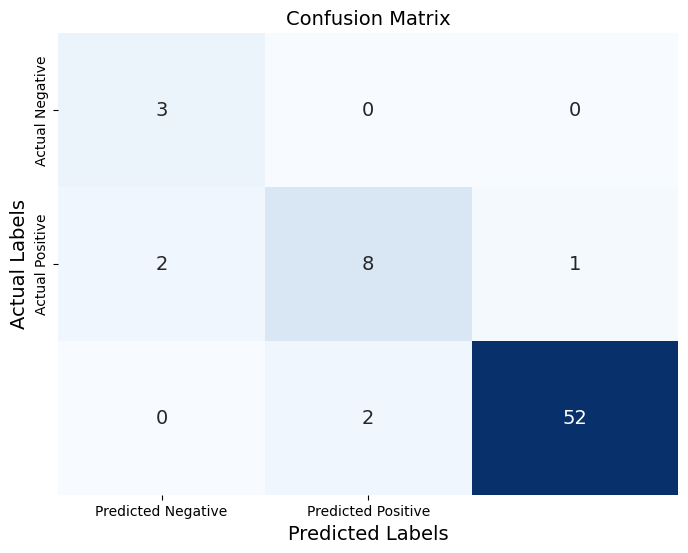

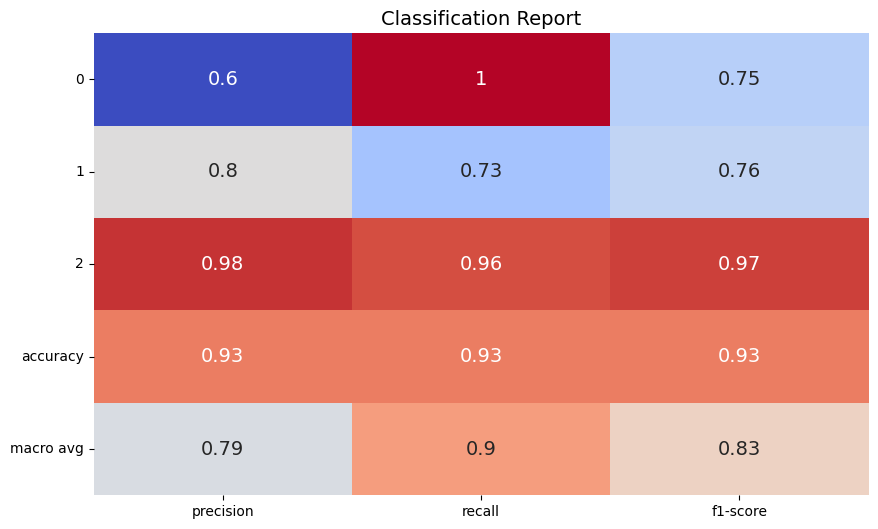

In [277]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report)

# Plot the classification report using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1].T, annot=True, cmap='coolwarm', cbar=False)
plt.title('Classification Report')
plt.yticks(rotation=0)
plt.show()

# SVC

Accuracy: 0.8970588235294118
Precision: 0.8526
Recall: 0.8971
F1 Score: 0.8736


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


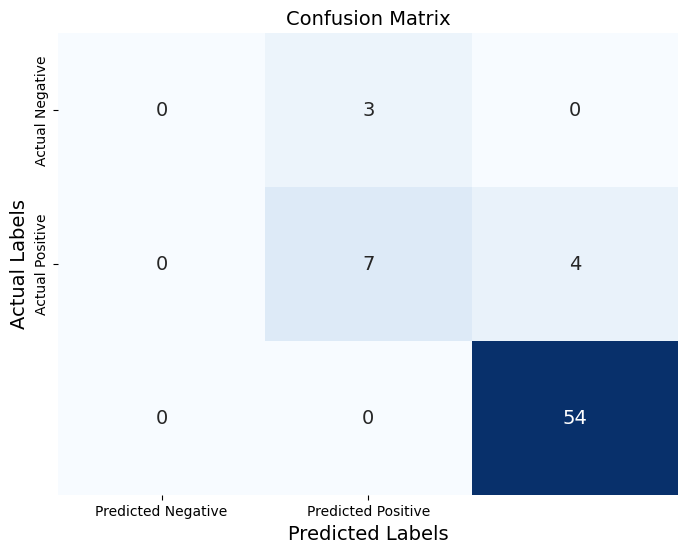

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


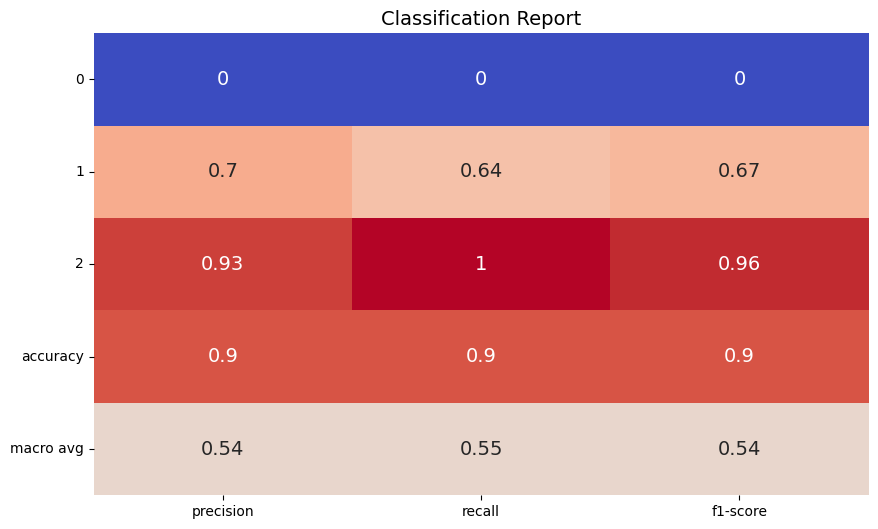

In [278]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = SVC(kernel='linear')  # You can also try other kernels like 'rbf', 'poly', etc.
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report)

# Plot the classification report using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1].T, annot=True, cmap='coolwarm', cbar=False)
plt.title('Classification Report')
plt.yticks(rotation=0)
plt.show()


# RandomForestClassifier

Accuracy: 0.9411764705882353
Precision: 0.9480
Recall: 0.9412
F1 Score: 0.9363


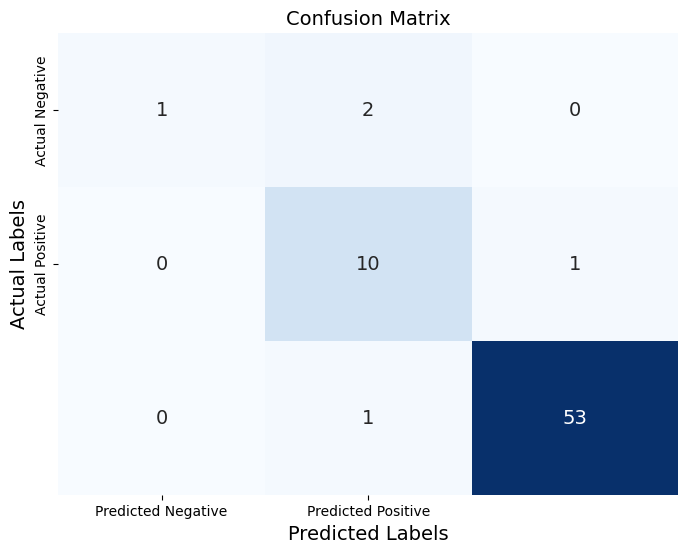

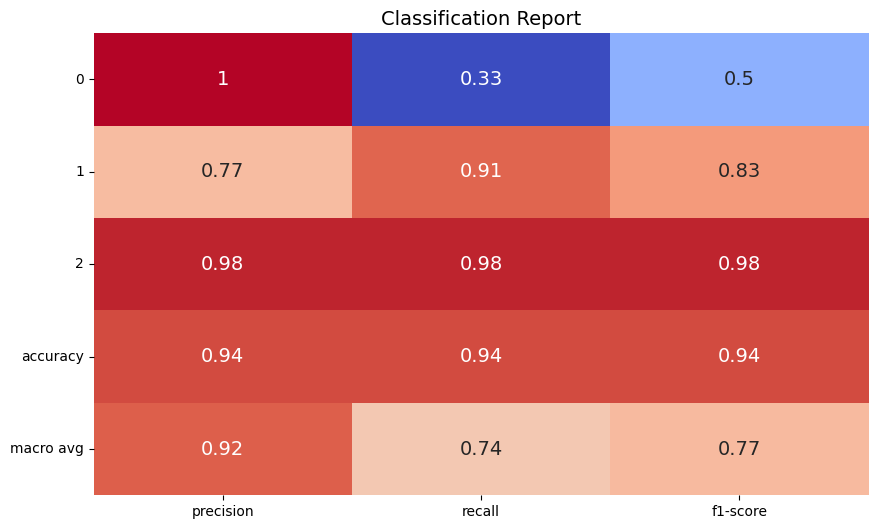

In [279]:
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

dump(rf, 'Random_Forest_Classification.pickle')

y_pred = rf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report)

# Plot the classification report using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1].T, annot=True, cmap='coolwarm', cbar=False)
plt.title('Classification Report')
plt.yticks(rotation=0)
plt.show()

# Shap For Random Forest

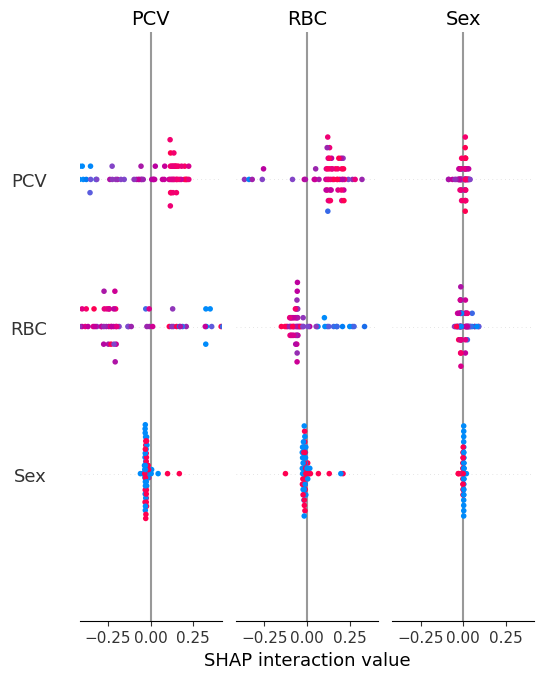

In [280]:
import shap
# Compute SHAP values
# explainer = shap.Explainer(model1, x_train)
explainer_random_forest = shap.TreeExplainer(rf, X_train)
shap_values_random_forest = explainer_random_forest(X_test, check_additivity=False)

# Visualizations
# shap.summary_plot(shap_values_random_forest, x_test, plot_type="bar", feature_names=x.columns)  # Summary bar plot
shap.summary_plot(shap_values_random_forest, X_test, plot_type="dot", feature_names=x.columns)  # Summary bee-swarm plot

# Classification Summery


| Model | Accuracy | Precision | Recall | F1 Score |
|-----------------|----------------|--------------|-----------------|----------|
| XBGClassifier| 0.9264705882352942   | 0.9350 | 0.9265 | 0.9282
| SVC| 0.8970588235294118   | 0.8526 | 0.8971 | 0.8736
| SVC| 0.9411764705882353   | 0.9480 | 0.9412 | 0.9363